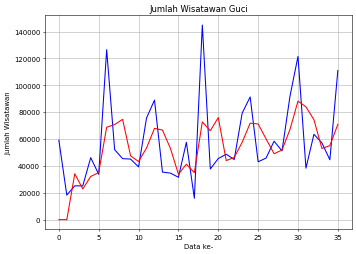

In [2]:
import tkinter as tk
from tkinter import filedialog, messagebox, ttk
from tkinter import Tk, Frame, Menu
from tkinter import *
import pandas as pd
import numpy as np
from tkinter import scrolledtext
from tkinter.scrolledtext import ScrolledText
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)
from matplotlib.figure import Figure
from sklearn.metrics import mean_squared_error
root=tk.Tk()
root.configure(bg="lightgreen")
root.geometry("1000x500")
root.title("Peramalan Moving Average Jumlah Wisatawan Guci")

#Judul
labeljudul =Label(root, text="PERAMALAN DENGAN METODE MOVING AVERAGE JUMLAH WISATAWAN GUCI",bg='lightgreen',fg="black", font=('cooper black', 16, 'bold'))
labeljudul.place(relx=0.5,rely=0.003,relwidth=1,relheight=0.1, anchor='n')

#Frame Deskripsi
frame_des =tk.LabelFrame(root, text="Deskripsi", font="algerian")
frame_des.place(height=115, width=400, rely=0.1, relx=0.35)

label_des = ttk.Label(frame_des,text="Moving Average adalah metode peramalan perataan nilai dengan \nmengambil sekelompok nilai pengamatan yang kemudian dicari rata-\nratanya, lalu menggunakan rata-rata tersebut sebagai ramalan untuk \nperiode berikutnya. Dalam GUI ini hanya bisa digunakan dalam peramalan \njumlah pengunjung di Wisata Guci dimana akan digunakan data \n3 tahun")
label_des.place(rely=0, relx=0)

#Input Data
frame_data =tk.LabelFrame(root, text="Data", font="algerian")
frame_data.place(height=100, width=400, rely=0.1, relx=0.01)

# Frame for TreeView
frame1 = tk.LabelFrame(root, text="Tampilan Data", font="algerian")
frame1.place(height=483, width=400,rely=0.25, relx=0.01)


label_file = ttk.Label(frame_data, text="No File Selected")
label_file.place(rely=0, relx=0)
pd.set_option('display.max_columns', 500)

# Frame Keakuratan
frame_keakuratan=tk.LabelFrame(root,text="Keakuratan",font="algerian")
frame_keakuratan.place(height=150, width=400,rely=0.29, relx=0.35)

#Frame Plot
frame_plot=tk.LabelFrame(root,text="Plot Peramalan",font="algerian")
frame_plot.place(height=300, width=400,rely=0.52, relx=0.35)

#Frame Hasil Peramalan
frame_hasil=tk.LabelFrame(root,text="Hasil Peramalan",font="algerian")
frame_hasil.place(height=580, width=400,rely=0.1, relx=0.7)

#Button frame_data
button1=tk.Button(frame_data, text="Input File", bg="yellow", command=lambda: file_dialog())
button1.place(rely=0.4, relx=0.25)

button2 = tk.Button(frame_data, text="Load File", bg="yellow",command=lambda: tampilan_data())
button2.place(rely=0.4, relx=0.02)

button3 = tk.Button(frame_data, text="Clear", bg="yellow",command=lambda: clear_data())
button3.place(rely=0.4, relx=0.55)

button4 = tk.Button(frame_data, text="Hitung", bg="yellow",command=lambda: hitung())
button4.place(rely=0.4, relx=0.8)

#Label frame_keakuratan
label1 = Label(frame_keakuratan, text="MSE",bg='yellow',fg="black", bd=8)
label1.place(relx=0.02,rely=0.2,relwidth=0.4,relheight=0.3)

label2 = Label(frame_keakuratan, text="RMSE",bg='yellow',fg="black", bd=8)
label2.place(relx=0.02,rely=0.55,relwidth=0.4,relheight=0.3)

label3 = Label(frame_keakuratan,bg='white',fg="black", bd=8)
label3.place(relx=0.57,rely=0.2,relwidth=0.4,relheight=0.3)

label4 = Label(frame_keakuratan,bg='white',fg="black", bd=8)
label4.place(relx=0.57,rely=0.55,relwidth=0.4,relheight=0.3)

pd.set_option('display.max_columns', 500)


## Treeview Widget
tv1 = ttk.Treeview(frame1)
tv1.place(relheight=30, relwidth=30) # mengaturatur tinggi dan lebar widget menjadi 100% dari wadahnya (frame1).
treescrolly = tk.Scrollbar(frame1, orient="vertical", command=tv1.yview) # command means memperbarui tampilan widget yaxis
treescrollx = tk.Scrollbar(frame1, orient="horizontal", command=tv1.xview) # command means memperbarui tampilan widgetxaxis
tv1.configure(xscrollcommand=treescrollx.set, yscrollcommand=treescrolly.set) # Menetapkan scrollbar ke Treeview Widget
treescrollx.pack(side="bottom", fill="x") #Membuat scrollbar mengisi sumbu x di widget Treeview  
treescrolly.pack(side="right", fill="y") #embuat scrollbar mengisi sumbu y di widget Treeview



def file_dialog():
    filename = filedialog.askopenfilename(initialdir="/",
                                          title="Pilih File yang Digunakan",
                                          filetype=(("xlsx files", ".xlsx"),("All Files", ".*")))
    label_file["text"] = filename
    return None
def tampilan_data():
    """If the file selected is valid this will load the file into the Treeview"""
    file_path = label_file["text"]
    global df
    try:
        excel_filename = r"{}".format(file_path)
        if excel_filename[-4:] == ".csv":
            df = pd.read_csv(excel_filename)
        else:
            df = pd.read_excel(excel_filename)

    except ValueError:
        tk.messagebox.showerror("Information", "The file you have chosen is invalid")
        return None
    except FileNotFoundError:
        tk.messagebox.showerror("Information", f"No such file as {file_path}")
        return None
    clear_data()
    tv1["column"] = list(df.columns)
    tv1["show"] = "headings"
    for column in tv1["columns"]:
        tv1.heading(column, text=column) # let the column heading = column name

    df_rows = df.to_numpy().tolist() # turns the dataframe into a list of lists
    for row in df_rows:
        tv1.insert("", "end", values=row) # inserts each list into the treeview. 
    return None
def clear_data():
    tv1.delete(*tv1.get_children())
    return None

def hitung():
    global df
    data=df
    data['prediksi']=data.iloc[:,0].rolling(window=3).mean()
    Labelhasil=Label(frame_hasil, text=data)
    Labelhasil.pack()
    data['prediksi']=data['prediksi'].replace(np.nan,0)
    Labelhasil1=Label(frame_hasil,bg='white',text=data)
    Labelhasil1.pack()
    
    mse=mean_squared_error(data['prediksi'],data['Wisatawan'])
    labelmse = Label(label3,bg='white', text=mse)
    labelmse.pack()
    
    rmse=np.sqrt(mse)
    labelrmse = Label(label4,bg='white', text=rmse)
    labelrmse.pack()
    
    a=range(len(data))
    fig = plt.figure(figsize=(5,4), dpi=50)
    ax1 = fig.add_subplot()
    ax1.plot(a, data['Wisatawan'], color='blue')
    ax1.plot(a, data['prediksi'], color='red')
    ax1.set_xlabel('Data ke-')
    ax1.set_ylabel('Jumlah Wisatawan')
    ax1.set_title('Jumlah Wisatawan Guci')
    ax1.grid(True)
    canvas = FigureCanvasTkAgg(fig, frame_plot) # A tk.DrawingArea.
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

root.mainloop()